<a href="https://colab.research.google.com/github/MelikeApalak/makine_ogrenmesi/blob/main/s%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 11.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

**Lojistik** **Regresyon** 

*Model*

In [3]:
diabetes = pd.read_csv("/content/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#problem: Yeni bir hasta geldiğinde şeker hastası olup olmadığına karar vermek.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

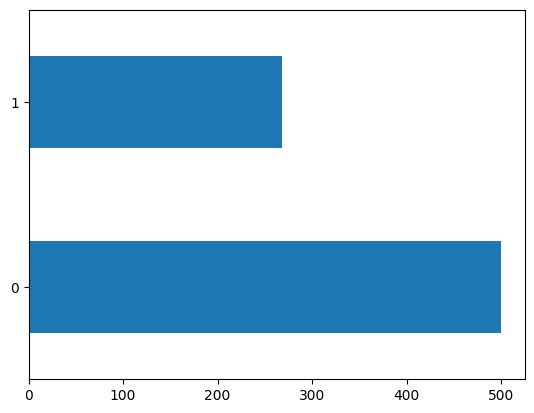

In [ ]:
df["Outcome"].value_counts().plot.barh();

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"],axis =1)

In [ ]:
#statsmodel

In [ ]:
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 22 May 2023   Pseudo R-squ.:                 0.05922
Time:                        08:42:03   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [ ]:
#Scikit-learn
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [ ]:
#sabit değer
loj_model.intercept_

array([-5.89249766])

In [ ]:
#bağımsız değişkenlerin katsayı değerleri
loj_model.coef_

array([[ 1.17061865e-01,  2.83893855e-02, -1.68880903e-02,
         7.55635388e-04, -6.42919999e-04,  5.97757973e-02,
         6.77489484e-01,  7.24167534e-03]])

**Tahmin** **&** **Model Tuning**

In [ ]:
y_pred = loj_model.predict(X)

In [ ]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

In [ ]:
accuracy_score(y,y_pred)

0.7747395833333334

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [ ]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
loj_model.predict_proba(X)[0:10]
#çıktıdaki ilk index sıfır sınıfına ait olasılığı verir.
#çıktıdaki ikinci index bir sınıfına ait olasılığı verir.

array([[0.35038581, 0.64961419],
       [0.91703384, 0.08296616],
       [0.22474952, 0.77525048],
       [0.92140079, 0.07859921],
       [0.16726037, 0.83273963],
       [0.79899939, 0.20100061],
       [0.88020685, 0.11979315],
       [0.27812564, 0.72187436],
       [0.32058587, 0.67941413],
       [0.92275333, 0.07724667]])

In [ ]:
#gerçek değerler
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [ ]:
#eşik değerleri kendimiz belirleyerek de 1-0 dönüşümü yapabiliriz.

In [ ]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
#1. indexe sahip sütunlar topladık. Eşik değeri kendimiz belirleyip dönüştürme işlemi yapacağız.

In [ ]:
y_probs[0:10]

array([0.64961419, 0.08296616, 0.77525048, 0.07859921, 0.83273963,
       0.20100061, 0.11979315, 0.72187436, 0.67941413, 0.07724667])

In [ ]:
y_pred = [1 if i>0.5 else 0 for i in y_probs]

In [ ]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [ ]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

In [ ]:
accuracy_score(y,y_pred)

0.7747395833333334

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



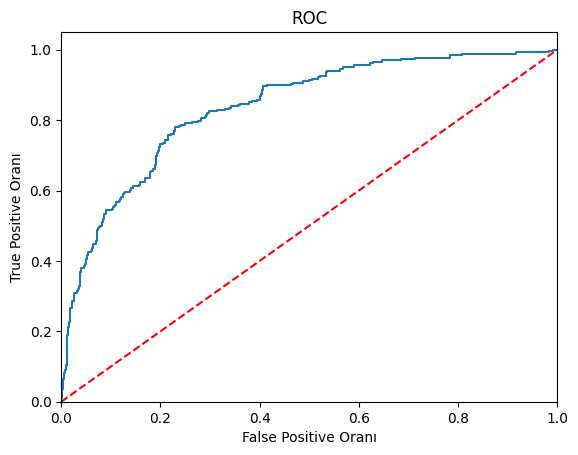

In [ ]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [ ]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [ ]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [ ]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7748188405797102

### Gaussian Naive Bayes

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,
                                                    random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [ ]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
nb_model.predict_proba(X_test)[0:10]
#0-1 e ait olasılıklar(indexlerde)

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7445887445887446

In [ ]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

### KNN

### Model & Tahmin

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,
                                                    random_state=42)

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



### Model Tuning

In [ ]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor: 0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [ ]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [ ]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [ ]:
y_pred = knn_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7316017316017316

### SVC

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,
                                                    random_state=42)

In [ ]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [ ]:
svm_model

SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7445887445887446

### Model Tuning

In [ ]:
svc_params = {"C": np.arange(1,10)}
svc = SVC(kernel = "linear")
svc_cv_model = GridSearchCV(svc,svc_params,
                            cv=10, 
                            n_jobs= -1,
                            verbose=2)
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


KeyboardInterrupt: ignored

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(kernel="linear", C=5).fit(X_train,y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

### RBF SVC

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,
                                                    random_state=42)

In [ ]:
svc_model = SVC(kernel = "rbf").fit(X_train,y_train)

In [ ]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [ ]:
# model tuning

In [ ]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
              "gamma": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]}

In [ ]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params,
                            cv=10,
                            n_jobs= -1,
                            verbose= 2)
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [ ]:
svc_tuned = SVC(C=10, gamma=0.0001).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

### Yapay Sinir Ağları

In [ ]:
# Model & Tahmin

In [5]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,
                                                    random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler()

In [9]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled[0:5]

array([[-0.8362943 , -0.80005088, -0.53576428, -0.15714558, -0.18973183,
        -1.06015343, -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365,  0.55361931,  2.13020339,
         0.64646721, -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566,  1.39361417,  1.47853619,
         1.35537117, -0.30699103, -0.77729576],
       [ 0.08397217,  0.31417602, -0.09322566,  0.03669939,  0.74866893,
         0.14760887, -0.90681191, -0.43466673],
       [-0.8362943 , -0.5524449 , -2.19528409,  1.13515422,  0.02749057,
         1.48664968, -0.83951493, -0.00638043]])

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [13]:
mlpc.coefs_

[array([[ 6.59988333e-02,  2.06855950e-01, -2.10128369e-01,
         -2.88585743e-01,  3.91530061e-01, -1.25124112e-01,
         -1.64192093e-01,  2.39970779e-01, -1.63670237e-01,
         -1.18006111e-01,  7.88928083e-02, -4.75036788e-01,
         -1.31274303e-01, -3.40091160e-01,  1.20540178e-02,
         -1.53266406e-01,  1.51338251e-01,  1.23271962e-02,
          1.82637811e-04, -2.69958535e-01, -1.70181356e-01,
         -2.31316470e-01,  1.98378015e-01, -3.72570457e-01,
         -1.85401739e-02, -8.80772033e-02,  2.59681228e-01,
         -6.49056301e-02,  1.50148065e-01, -1.19607353e-01,
         -1.54648527e-01, -3.41383934e-01, -3.04275484e-01,
          2.23538654e-01, -2.75732114e-01, -1.12974130e-01,
         -1.10243783e-01, -1.32276725e-01, -7.17124801e-02,
         -3.70013681e-01, -2.94314779e-01, -2.66788055e-01,
          9.58090384e-02,  1.52356294e-02,  8.82596933e-02,
         -1.03625479e-01,  1.18929173e-01,  1.77100563e-01,
         -2.68864458e-01,  2.06930798e-0

In [14]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7272727272727273

### Model Tuning

In [15]:
mlpc

MLPClassifier()

In [16]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001, 0.0001],
               "hidden_layer_sizes": [(10,10,10),
                                      (100,100,100),
                                      (100,100),
                                      (3,5),
                                      (5,3)],
               "solver": ["lbfgs","adam","sdg"],
               "activation": ["relu","logistic"]}

In [17]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params,
                             cv=10,
                             n_jobs= -1,
                             verbose=2)
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 0.0001],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sdg']},
             verbose=2)

In [19]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'logistic', 'alpha': 0.02, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}


In [22]:
mlpc_tuned = MLPClassifier(activation="logistic",
                          alpha=0.01,
                          hidden_layer_sizes= (100,100,100),
                          solver="adam")

In [24]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.01,
              hidden_layer_sizes=(100, 100, 100))

In [25]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

### CART

In [48]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,
                                                    random_state=42)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train,y_train)

In [54]:
cart_model

DecisionTreeClassifier()

In [33]:
!pip install skompiler
!pip install astor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54314 sha256=580f93e42795446fc31d9b032aa53f46066a3d9ff9abdb4998bce7f44ff424a0
  Stored in directory: /root/.cache/pip/wheels/c0/22/3d/bd8fd4c6cd205cf122a0974be908681472a6f44abd6b880614
Successfully built skompiler


In [34]:
from skompiler import skompile

In [55]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 1 if x[2] <= 67.0 else 0) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 0 if x[4] <= 57.5 else 1) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (1 if x[7] <= 61.5 else 0) if x[5] <= 9.649999618530273 else 0 if x[1] <=
    133.0 else 0 if x[7] <= 57.5 else 1 if x[0] <= 6.5 else 0) if x[5] <= 
    26.949999809265137 else (1 if x[1] 

In [57]:
x = [9]

In [58]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [59]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7056277056277056

In [60]:
# Model tuning

In [61]:
cart_model

DecisionTreeClassifier()

In [62]:
cart_grid = {"max_depth": range(1,10),
             "min_samples_split": list(range(2,50))}

In [65]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart,cart_grid, cv=10, n_jobs= -1, verbose=2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [66]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))


En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [67]:
#final
cart = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=19)
cart_tuned = cart.fit(X_train, y_train)

In [68]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

### Random Forests

In [69]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,
                                                    random_state=42)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [72]:
rf_model

RandomForestClassifier()

In [73]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

#### Model Tuning


In [74]:
rf_model

RandomForestClassifier()

In [76]:
rf_params = {"max_depth": [2,5,8,10],
             "max_features": [2,5,8],
             "n_estimators": [10,500,1000],
             "min_samples_split": [2,5,10]}

In [77]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv=10,
                           n_jobs=-1,
                           verbose=2)

In [ ]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [ ]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))


In [ ]:
#final
rf_tuned = RandomForestClassifier(max_depth =10,
                                  max_features=8,
                                  min_samples_split=10,
                                  n_estimators =1000)
rf_tuned.fit(X_train, y_train)


In [ ]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index=X_train.columns)

In [ ]:
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",color="r")
plt.xlabel("Değişken Önem Düzeyleri")